In [2]:
from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

C:\Users\victo\AppData\Local\Temp\ipykernel_2468\3862492777.py:10: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


# F-Shape Heatmap Plot:

In [3]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment/x_data_4.csv")



In [4]:
x = gaze['left_gaze_point_on_display_area_x']*1920
y = gaze["left_gaze_point_on_display_area_y"]*-1080+1080

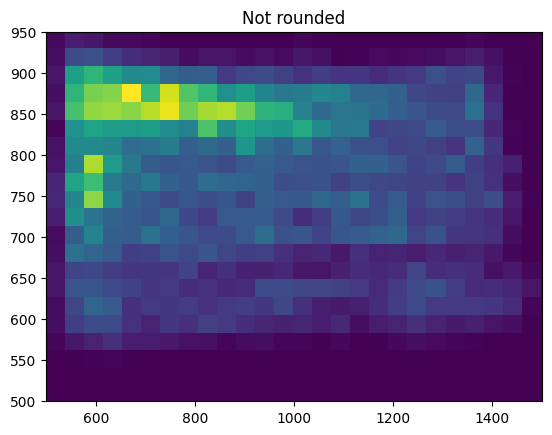

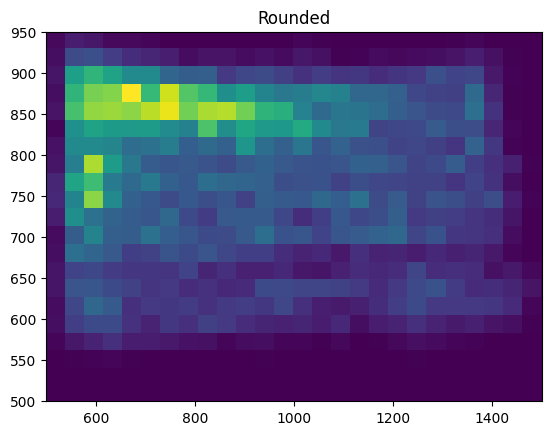

In [5]:
# First plot
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [0, 1920, 0, 1080]  # Define the extent
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Not rounded")
plt.xlim(500, 1500)  # Set x-axis limits
plt.ylim(500, 950)  # Set y-axis limits
plt.show()

# Second plot with rounded data
x1 = x.round(1)
y1 = y.round(1)
heatmap, xedges, yedges = np.histogram2d(x1, y1, bins=50)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.title("Rounded")
plt.xlim(500, 1500)  # Set x-axis limits
plt.ylim(500, 950)  # Set y-axis limits
plt.show()

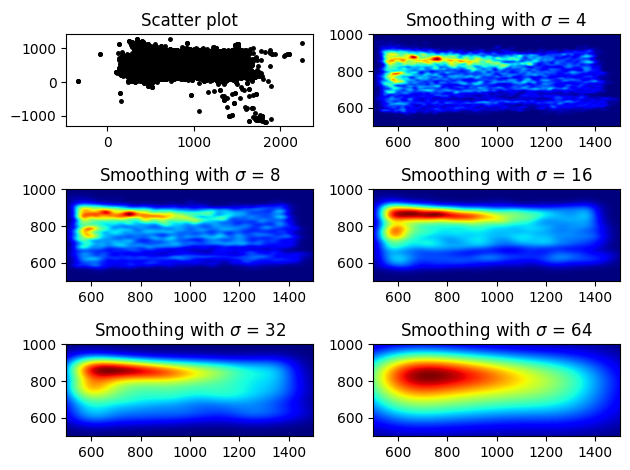

In [6]:

def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [0, 1920, 0, 1080]  # Define the extent
    return heatmap.T, extent

fig, axs = plt.subplots(3, 2)

# Generate some test data (assuming gaze is a DataFrame containing x and y coordinates)
x = gaze['left_gaze_point_on_display_area_x'] * 1920
y = gaze['left_gaze_point_on_display_area_y'] * -1080 + 1080

sigmas = [0, 4, 8, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet, aspect='auto')
        ax.set_title("Smoothing with $\sigma$ = %d" % s)
        ax.set_xlim(500, 1500)  # Set x-axis limits
        ax.set_ylim(500, 1000)  # Set y-axis limits

plt.tight_layout()
plt.show()

# Correlation Matrix

In [7]:
gaze.corr()
gaze.dropna()
print(gaze.corr())

                                    device_time_stamp  \
device_time_stamp                            1.000000   
left_gaze_origin_validity                         NaN   
right_gaze_origin_validity                        NaN   
left_gaze_origin_in_user_x                   0.510518   
left_gaze_origin_in_user_y                  -0.325495   
left_gaze_origin_in_user_z                   0.320923   
right_gaze_origin_in_user_x                  0.521811   
right_gaze_origin_in_user_y                 -0.339386   
right_gaze_origin_in_user_z                  0.303914   
left_gaze_origin_in_trackbox_x              -0.546808   
left_gaze_origin_in_trackbox_y               0.320354   
left_gaze_origin_in_trackbox_z               0.288782   
right_gaze_origin_in_trackbox_x             -0.542891   
right_gaze_origin_in_trackbox_y              0.336639   
right_gaze_origin_in_trackbox_z              0.288465   
left_gaze_point_validity                          NaN   
right_gaze_point_validity      

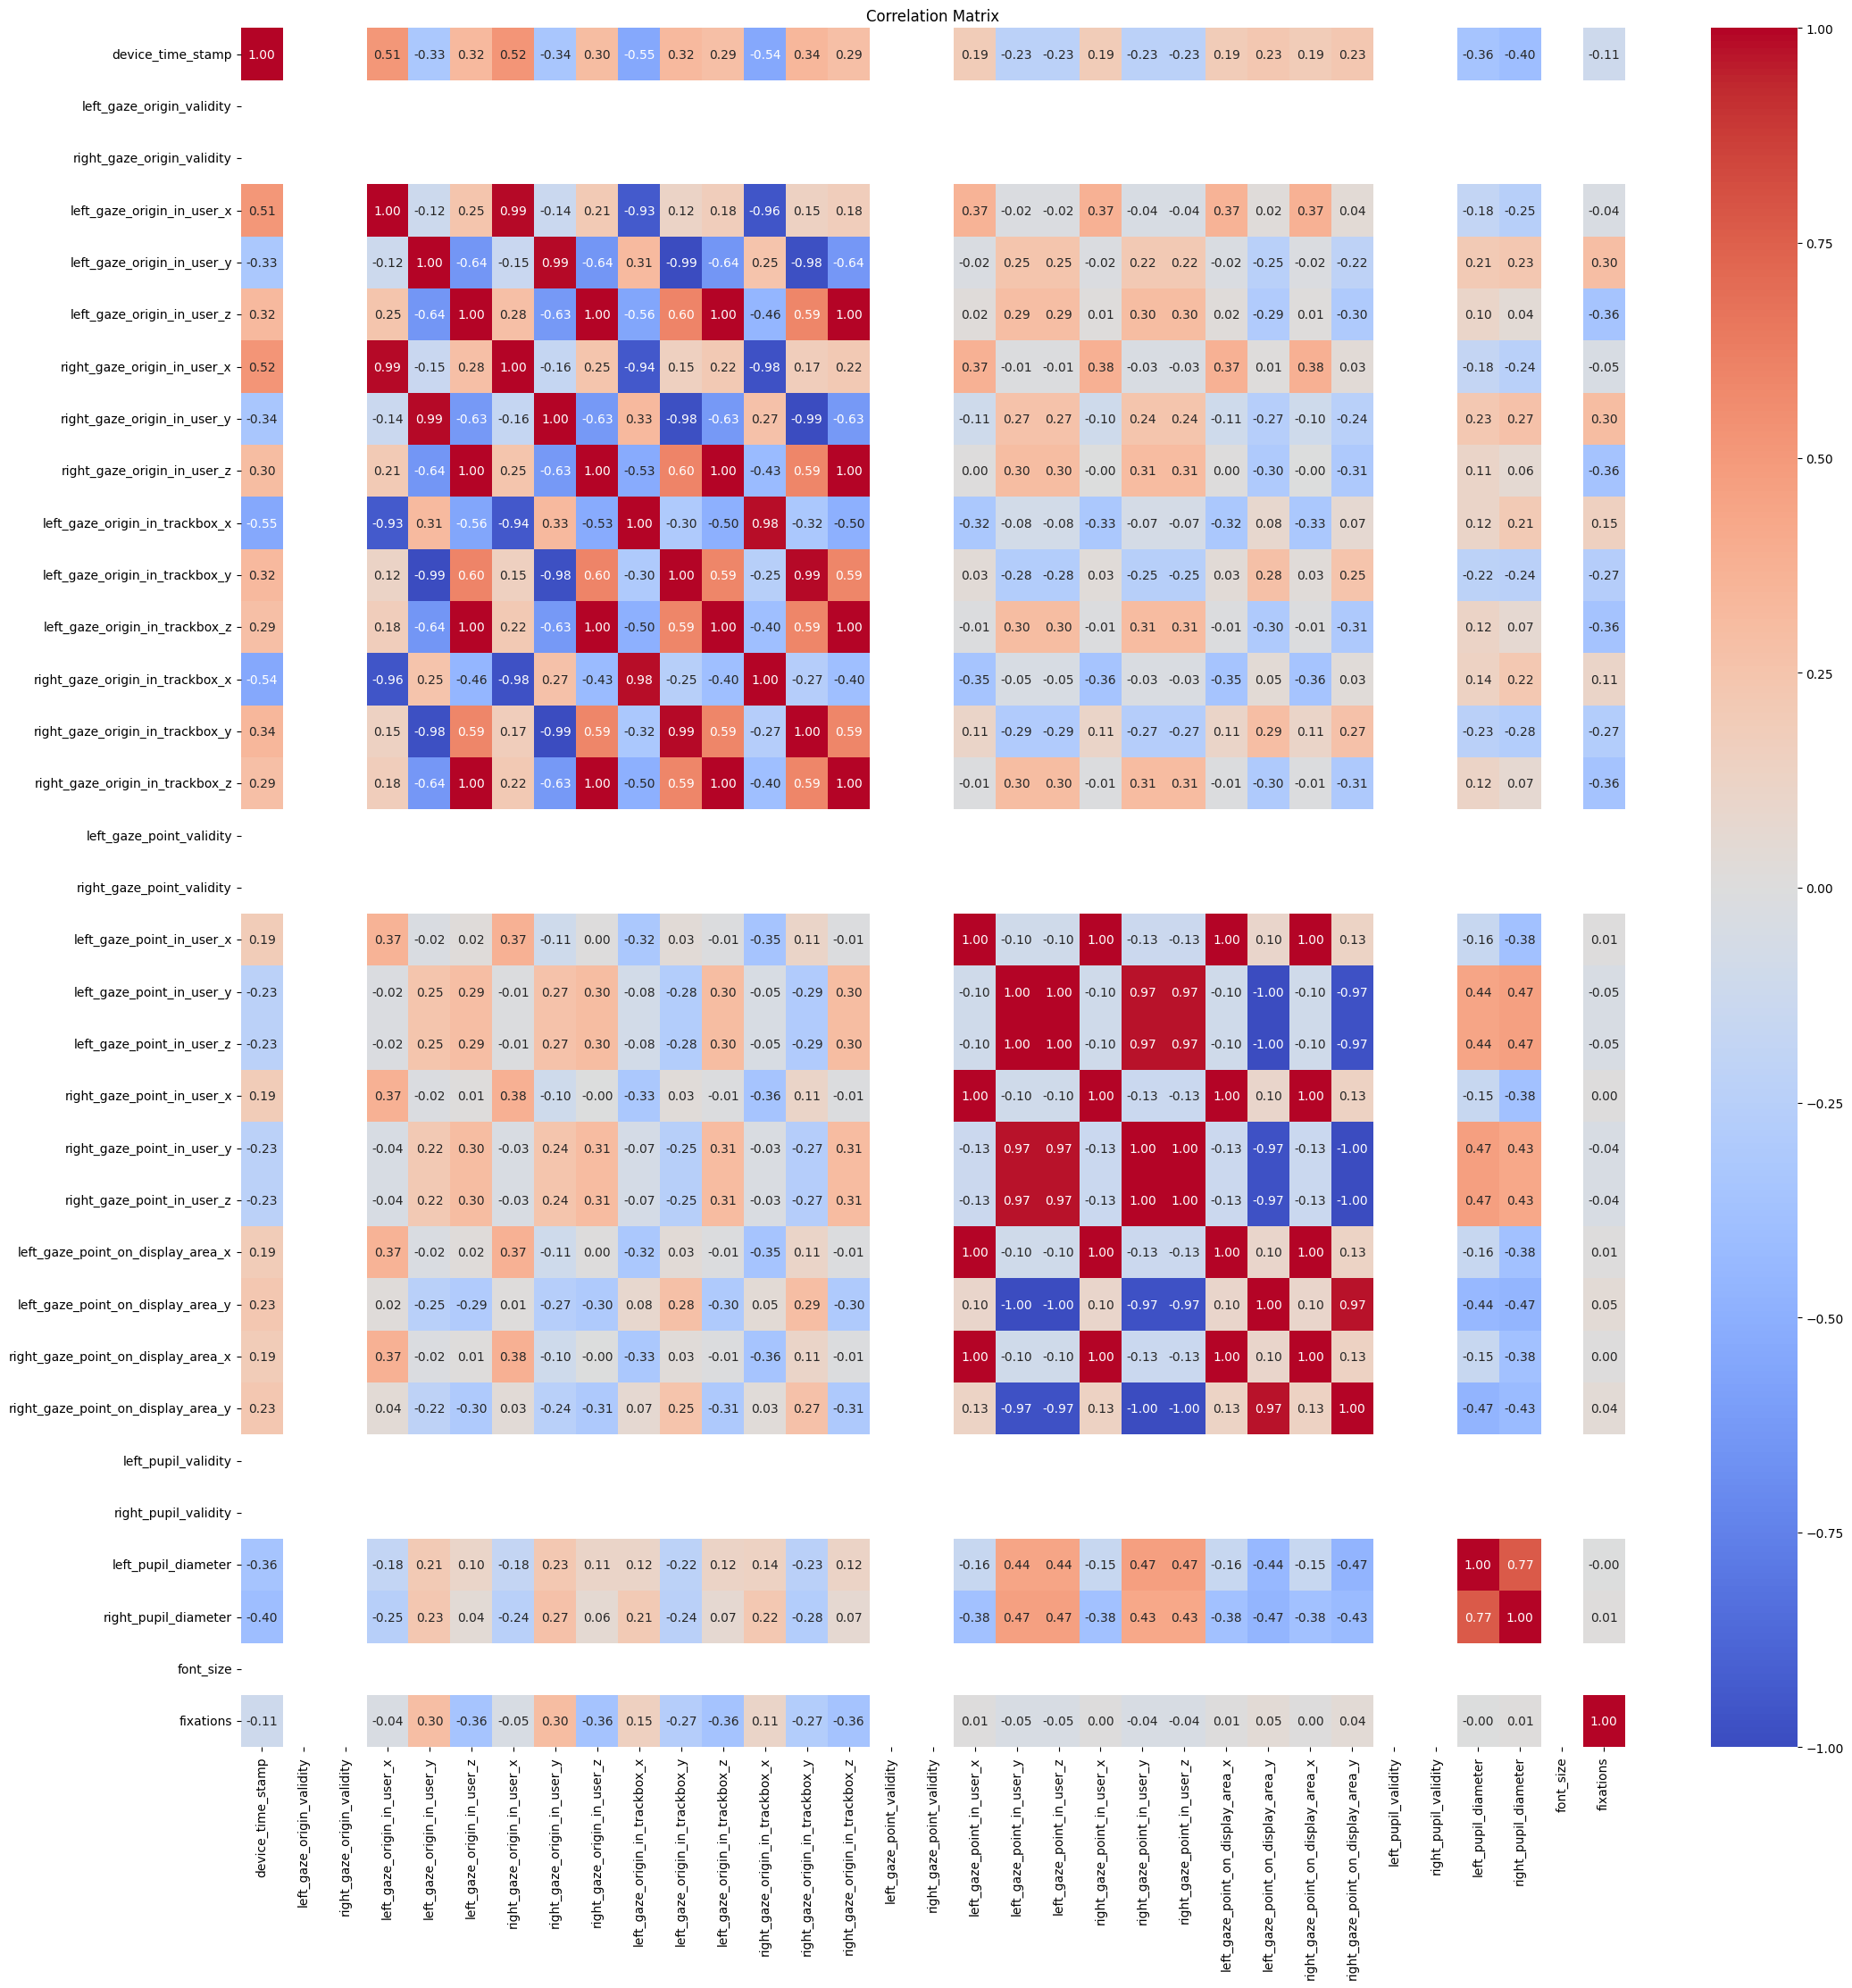

In [9]:
import seaborn as sns
correlation_matrix = gaze.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()